In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing


if __name__ == '__main__':
    multiprocessing.freeze_support()

    # 加载CIFAR-10数据集并进行预处理
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

    # 定义神经网络模型
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
            self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
            self.fc1 = nn.Linear(64 * 8 * 8, 512)
            self.fc2 = nn.Linear(512, 10)

        def forward(self, x):
            x = nn.functional.relu(self.conv1(x))
            x = nn.functional.max_pool2d(x, 2)
            x = nn.functional.relu(self.conv2(x))
            x = nn.functional.max_pool2d(x, 2)
            x = x.view(-1, 64 * 8 * 8)
            x = nn.functional.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    # 创建模型实例、定义损失函数和优化器
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    # 在训练集上训练模型
    def train(net, criterion, optimizer, epochs):
        for epoch in range(epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 200 == 199:
                    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
                    running_loss = 0.0

    # 在测试集上评估模型准确率
    def evaluate(net):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy on test images: %.2f %%' % (100 * correct / total))

    # 在训练集上训练模型
    train(net, criterion, optimizer, epochs=10)

    # 在测试集上评估模型准确率
    evaluate(net)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[1,   200] loss: 2.274
[1,   400] loss: 2.114
[1,   600] loss: 1.946
[2,   200] loss: 1.770
[2,   400] loss: 1.699
[2,   600] loss: 1.610
[3,   200] loss: 1.518
[3,   400] loss: 1.476
[3,   600] loss: 1.453
[4,   200] loss: 1.370
[4,   400] loss: 1.370
[4,   600] loss: 1.342
[5,   200] loss: 1.295
[5,   400] loss: 1.277
[5,   600] loss: 1.259
[6,   200] loss: 1.210
[6,   400] loss: 1.200
[6,   600] loss: 1.207
[7,   200] loss: 1.159
[7,   400] loss: 1.144
[7,   600] loss: 1.143
[8,   200] loss: 1.124
[8,   400] loss: 1.105
[8,   600] loss: 1.084
[9,   200] loss: 1.055
[9,   400] loss: 1.041
[9,   600] loss: 1.049
[10,   200] loss: 1.012
[10,   400] loss: 1.001
[10,   600] loss: 0.990
Accuracy on test images: 62.99 %


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing

# 加载CIFAR-10数据集并进行预处理
def load_preprocess_cifar10():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

    return trainloader, testloader

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_model(model, trainloader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 200 == 199:
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
                running_loss = 0.0

def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('测试图像准确率: %.2f %%' % (100 * correct / total))

if __name__ == '__main__':
    multiprocessing.freeze_support()

    trainloader, testloader = load_preprocess_cifar10()

    net = Net()
    criterion = nn.CrossEntropyLoss()
    lr=0.01
    momentum=0.9
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    train_model(net, trainloader, criterion, optimizer, epochs=10)
    evaluate_model(net, testloader)


Files already downloaded and verified
Files already downloaded and verified
[1,   200] loss: 1.910
[1,   400] loss: 1.476
[1,   600] loss: 1.354
[2,   200] loss: 1.142
[2,   400] loss: 1.079
[2,   600] loss: 1.025
[3,   200] loss: 0.876
[3,   400] loss: 0.872
[3,   600] loss: 0.852
[4,   200] loss: 0.699
[4,   400] loss: 0.690
[4,   600] loss: 0.694
[5,   200] loss: 0.524
[5,   400] loss: 0.553
[5,   600] loss: 0.553
[6,   200] loss: 0.382
[6,   400] loss: 0.400
[6,   600] loss: 0.412
[7,   200] loss: 0.234
[7,   400] loss: 0.248
[7,   600] loss: 0.294
[8,   200] loss: 0.144
[8,   400] loss: 0.156
[8,   600] loss: 0.178
[9,   200] loss: 0.079
[9,   400] loss: 0.093
[9,   600] loss: 0.110
[10,   200] loss: 0.053
[10,   400] loss: 0.054
[10,   600] loss: 0.072
Accuracy on test images: 73.46 %


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing

# 添加if __name__ == '__main__':语句并调用freeze_support()
if __name__ == '__main__':
    multiprocessing.freeze_support()

    # 加载CIFAR-10数据集并进行预处理
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

    # 定义神经网络模型
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
            self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
            self.fc1 = nn.Linear(64 * 8 * 8, 512)
            self.fc2 = nn.Linear(512, 10)

        def forward(self, x):
            x = nn.functional.relu(self.conv1(x))
            x = nn.functional.max_pool2d(x, 2)
            x = nn.functional.relu(self.conv2(x))
            x = nn.functional.max_pool2d(x, 2)
            x = x.view(-1, 64 * 8 * 8)
            x = nn.functional.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    # 创建模型实例、定义损失函数和优化器
    net = Net()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

    # 在训练集上训练模型
    def train(net, criterion, optimizer, epochs):
        for epoch in range(epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:
                    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
                    running_loss = 0.0

    # 在测试集上评估模型准确率
    def evaluate(net):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = net(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy on test images: %.2f %%' % (100 * correct / total))

    # 在训练集上训练模型
    train(net, criterion, optimizer, epochs=10)

    # 在测试集上评估模型准确率
    evaluate(net)


Files already downloaded and verified
Files already downloaded and verified
[1,   100] loss: 1.070
[1,   200] loss: 0.904
[1,   300] loss: 0.785
[1,   400] loss: 0.724
[1,   500] loss: 0.687
[1,   600] loss: 0.664
[1,   700] loss: 0.632
[2,   100] loss: 0.579
[2,   200] loss: 0.561
[2,   300] loss: 0.537
[2,   400] loss: 0.519
[2,   500] loss: 0.506
[2,   600] loss: 0.501
[2,   700] loss: 0.491
[3,   100] loss: 0.442
[3,   200] loss: 0.446
[3,   300] loss: 0.429
[3,   400] loss: 0.422
[3,   500] loss: 0.421
[3,   600] loss: 0.418
[3,   700] loss: 0.413
[4,   100] loss: 0.352
[4,   200] loss: 0.346
[4,   300] loss: 0.343
[4,   400] loss: 0.343
[4,   500] loss: 0.360
[4,   600] loss: 0.349
[4,   700] loss: 0.350
[5,   100] loss: 0.264
[5,   200] loss: 0.266
[5,   300] loss: 0.254
[5,   400] loss: 0.282
[5,   500] loss: 0.284
[5,   600] loss: 0.275
[5,   700] loss: 0.276
[6,   100] loss: 0.187
[6,   200] loss: 0.199
[6,   300] loss: 0.192
[6,   400] loss: 0.198
[6,   500] loss: 0.202
[6, 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing


def load_preprocess_cifar10(batch_size:int):
    # 对图像进行加载+预处理
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])  
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return trainloader, testloader

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_and_evaluate_model(lr:float,momentum:float,weight_decay:float,batch_size:int,cycles_num:int):
    trainloader, testloader = load_preprocess_cifar10(batch_size)

    net = Net()
    # 定义loss函数和优化器
    criterion = nn.CrossEntropyLoss()
    
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum,weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    test_accuracies = []
    train_accuracies = []
    for _ in range(cycles_num):
        train_model(net, trainloader, criterion, optimizer)
        # 测试模型准确率
        test_accuracies.append(evaluate_model(net, testloader))
        # 训练集上训练模型
        train_accuracies.append(evaluate_model(net, trainloader))
        # 更新学习率
        scheduler.step()
    return test_accuracies,train_accuracies

def train_model(model, trainloader, criterion, optimizer):
    model.train()
    for _, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (100 * correct / total)

if __name__ == '__main__':
    multiprocessing.freeze_support()
    # li1 = train_and_evaluate_model(lr=0.01,momentum=0.9,weight_decay=0.01,batch_size=64,cycles_num=20) 第二高
    # print(li1)
    # li2 = train_and_evaluate_model(lr=0.01,momentum=0.9,weight_decay=0.001,batch_size=64,cycles_num=20) 高
    # print(li2)
    # li3 = train_and_evaluate_model(lr=0.01,momentum=0.09,weight_decay=0.01,batch_size=64,cycles_num=20)
    # print(li3)
    # print('------------------')
    # li4 = train_and_evaluate_model(lr=0.01,momentum=0.09,weight_decay=0.001,batch_size=64,cycles_num=20)
    # print(li4)
    test_res, train_res = train_and_evaluate_model(lr=0.01,momentum=0.9,weight_decay=0.01,batch_size=64,cycles_num=20)
    print("test_res:")
    print(test_res)
    print("train_res:")
    print(train_res)
    


Files already downloaded and verified
Files already downloaded and verified
test_res:
[48.52, 57.51, 60.52, 63.66, 65.54, 62.34, 66.63, 65.79, 66.14, 66.43, 70.76, 71.44, 71.77, 72.62, 72.61, 72.14, 72.76, 72.47, 72.52, 72.38]
train_res:
[48.948, 59.062, 62.296, 66.412, 67.836, 64.514, 70.09, 68.814, 70.02, 70.078, 74.804, 75.982, 76.754, 77.772, 77.944, 78.2, 78.846, 78.602, 79.362, 79.232]


Files already downloaded and verified
Files already downloaded and verified
test_res:
[47.72, 55.27, 61.36, 63.6, 66.63, 69.18, 70.37, 70.66, 70.74, 72.75, 75.55, 76.3, 76.11, 76.6, 77.06, 77.01, 77.14, 77.2, 77.18, 77.56]
train_res:
[47.906, 55.306, 61.972, 64.264, 67.81, 70.098, 71.722, 72.718, 73.104, 74.832, 78.268, 78.662, 78.894, 79.502, 79.902, 79.818, 80.202, 80.144, 79.962, 80.644]


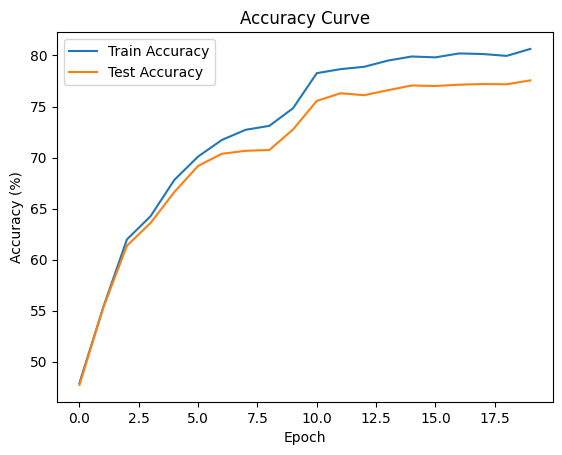

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing

import matplotlib.pyplot as plt

# 将训练集和测试集的准确率曲线绘制出来
def draw(train_accuracy, test_accuracy):
    epochs = len(train_accuracy)
    x = range(epochs)

    plt.plot(x, train_accuracy, label='Train Accuracy')
    plt.plot(x, test_accuracy, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

def load_preprocess_cifar10(batch_size:int):
    # 对图像进行加载+预处理
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])  
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return trainloader, testloader

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_and_evaluate_model(lr:float,momentum:float,weight_decay:float,batch_size:int,cycles_num:int):
    trainloader, testloader = load_preprocess_cifar10(batch_size)

    net = Net()
    criterion = nn.CrossEntropyLoss()
    
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum,weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    test_accuracies = []
    train_accuracies = []
    for _ in range(cycles_num):
        train_model(net, trainloader, criterion, optimizer)
        # 测试模型准确率
        test_accuracies.append(evaluate_model(net, testloader))
        # 训练集上训练模型
        train_accuracies.append(evaluate_model(net, trainloader))
        # 更新学习率
        scheduler.step()
    return test_accuracies,train_accuracies

def train_model(model, trainloader, criterion, optimizer):
    model.train()
    for _, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (100 * correct / total)

if __name__ == '__main__':
    multiprocessing.freeze_support()
    test_res, train_res = train_and_evaluate_model(lr=0.01,momentum=0.9,weight_decay=0.001,batch_size=64,cycles_num=20)
    print("test_res:")
    print(test_res)
    print("train_res:")
    print(train_res)
    draw(train_res, test_res)
    


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing

import matplotlib.pyplot as plt

# 将训练集和测试集的准确率曲线绘制出来
def draw(train_accuracy, test_accuracy, classes):
    epochs = len(train_accuracy)
    x = range(epochs)

    num_classes = len(classes)
    fig, axes = plt.subplots(num_classes, 1, figsize=(8, num_classes*4), sharex=True)

    for i, ax in enumerate(axes):
        if i < num_classes:
            ax.plot(x, train_accuracy[:, i], label='Train Accuracy')
            ax.plot(x, test_accuracy[:, i], label='Test Accuracy')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy (%)')
            ax.set_title(classes[i])
            ax.legend()

    plt.tight_layout()
    plt.show()

def load_preprocess_cifar10(batch_size:int):
    # 对图像进行加载+预处理
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])  
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return trainloader, testloader

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_and_evaluate_model(lr:float, momentum:float, weight_decay:float, batch_size:int, cycles_num:int):
    trainloader, testloader = load_preprocess_cifar10(batch_size)

    net = Net()
    criterion = nn.CrossEntropyLoss()
    
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    num_classes = 10
    test_accuracies = torch.zeros((cycles_num, num_classes))
    train_accuracies = torch.zeros((cycles_num, num_classes))

    for cycle in range(cycles_num):
        train_model(net, trainloader, criterion, optimizer)

        # 计算每个类别的准确率
        test_accuracies[cycle] = evaluate_model_per_class(net, testloader, num_classes)
        train_accuracies[cycle] = evaluate_model_per_class(net, trainloader, num_classes)

        # 更新学习率
        scheduler.step()

    return test_accuracies, train_accuracies

def train_model(model, trainloader, criterion, optimizer):
    model.train()
    for _, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model_per_class(model, dataloader, num_classes):
    model.eval()
    correct = torch.zeros(num_classes)
    total = torch.zeros(num_classes)

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            for i in range(num_classes):
                mask = labels == i
                total[i] += mask.sum().item()
                correct[i] += (predicted[mask] == labels[mask]).sum().item()
    
    accuracies = (100 * correct / total)
    return accuracies

if __name__ == '__main__':
    multiprocessing.freeze_support()
    test_res, train_res = train_and_evaluate_model(lr=0.01,momentum=0.9,weight_decay=0.001,batch_size=64,cycles_num=2)
    print("test_res:")
    print(test_res)
    print("train_res:")
    print(train_res)
    draw(train_res, test_res)
    


Files already downloaded and verified
Files already downloaded and verified
test_res:
tensor([[41.6000, 74.1000, 30.1000, 12.6000, 41.1000, 39.9000, 48.0000, 31.9000,
         84.1000, 29.2000],
        [43.4000, 57.9000, 50.8000, 26.2000, 29.6000, 53.4000, 50.8000, 73.1000,
         73.5000, 78.3000]])
train_res:
tensor([[42.0800, 72.2000, 28.9600, 13.5000, 42.5600, 40.7200, 46.6800, 30.4200,
         83.8800, 30.9800],
        [43.3000, 58.6200, 51.5600, 27.0200, 30.0600, 54.2800, 48.0600, 72.5200,
         73.9000, 78.4200]])


TypeError: draw() missing 1 required positional argument: 'classes'

Files already downloaded and verified
Files already downloaded and verified


(2, 1)
(2, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

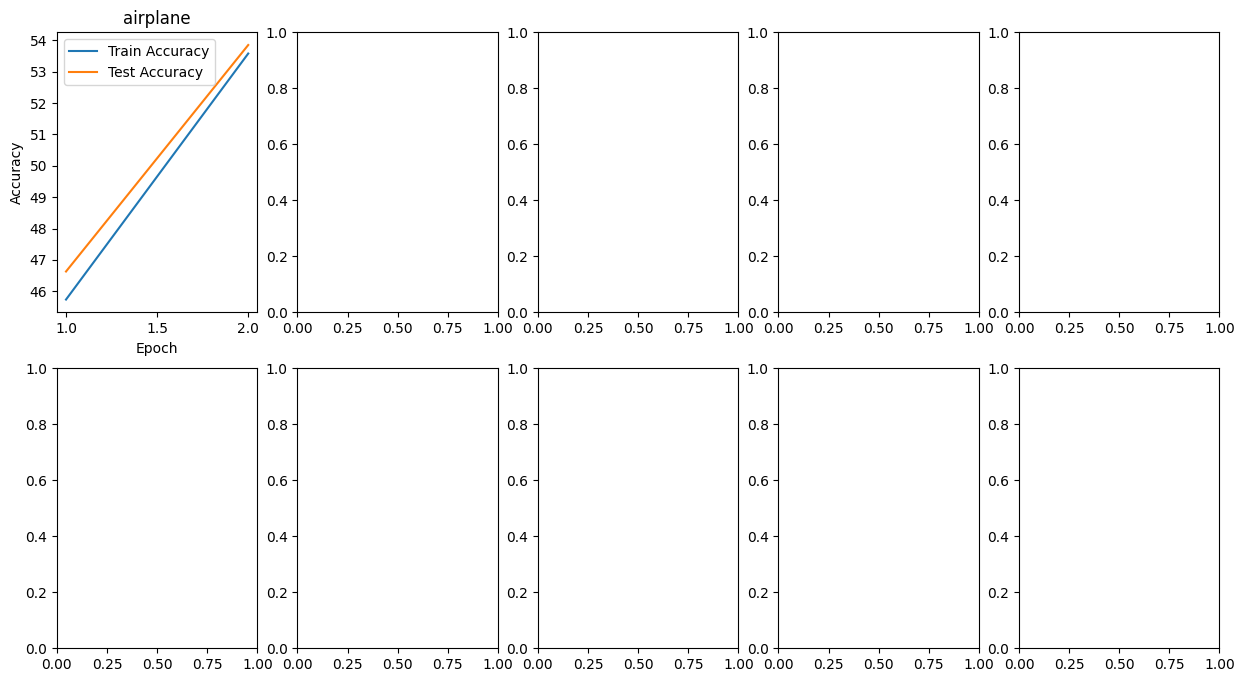

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

# 将训练集和测试集的准确率曲线绘制出来
def draw(train_accuracy, test_accuracy, classes):
    train_accuracy = np.array(train_accuracy)  # 转换为NumPy数组
    test_accuracy = np.array(test_accuracy)  # 转换为NumPy数组

    num_epochs = train_accuracy.shape[0]
    x = np.arange(1, num_epochs+1)

    num_classes = min(len(classes), 10)
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_classes:
            ax.plot(x, train_accuracy[:, i], label='Train Accuracy')
            ax.plot(x, test_accuracy[:, i], label='Test Accuracy')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')
            ax.set_title(classes[i])
            ax.legend()

    plt.ylim(0, 100)  # 设置y轴范围为0到100

    plt.tight_layout()
    plt.show()

def load_preprocess_cifar10(batch_size:int):
    # 对图像进行加载+预处理
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])  
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return trainloader, testloader

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_and_evaluate_model(lr:float,momentum:float,weight_decay:float,batch_size:int,epoch:int):
    trainloader, testloader = load_preprocess_cifar10(batch_size)

    net = Net()
    criterion = nn.CrossEntropyLoss()
    
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum,weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    test_accuracies = []
    train_accuracies = []
    for _ in range(epoch):
        train_model(net, trainloader, criterion, optimizer)
        # 测试模型准确率
        test_accuracies.append(evaluate_model(net, testloader))
        # 训练集上训练模型
        train_accuracies.append(evaluate_model(net, trainloader))
        # 更新学习率
        scheduler.step()
    return np.array(test_accuracies).reshape(-1, 1), np.array(train_accuracies).reshape(-1, 1)

def train_model(model, trainloader, criterion, optimizer):
    model.train()
    for _, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (100 * correct / total)

if __name__ == '__main__':
    multiprocessing.freeze_support()
    test_res, train_res = train_and_evaluate_model(lr=0.01, momentum=0.9, weight_decay=0.001, batch_size=64, epoch=)
    # 保存test_res和train_res 到文件
    

    print(train_res.shape) 
    print(test_res.shape)

    classes = ('airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    draw(train_res, test_res, classes)
    #展示出10个类的训练集和测试集的准确率平均值和方差和最大值和最小值


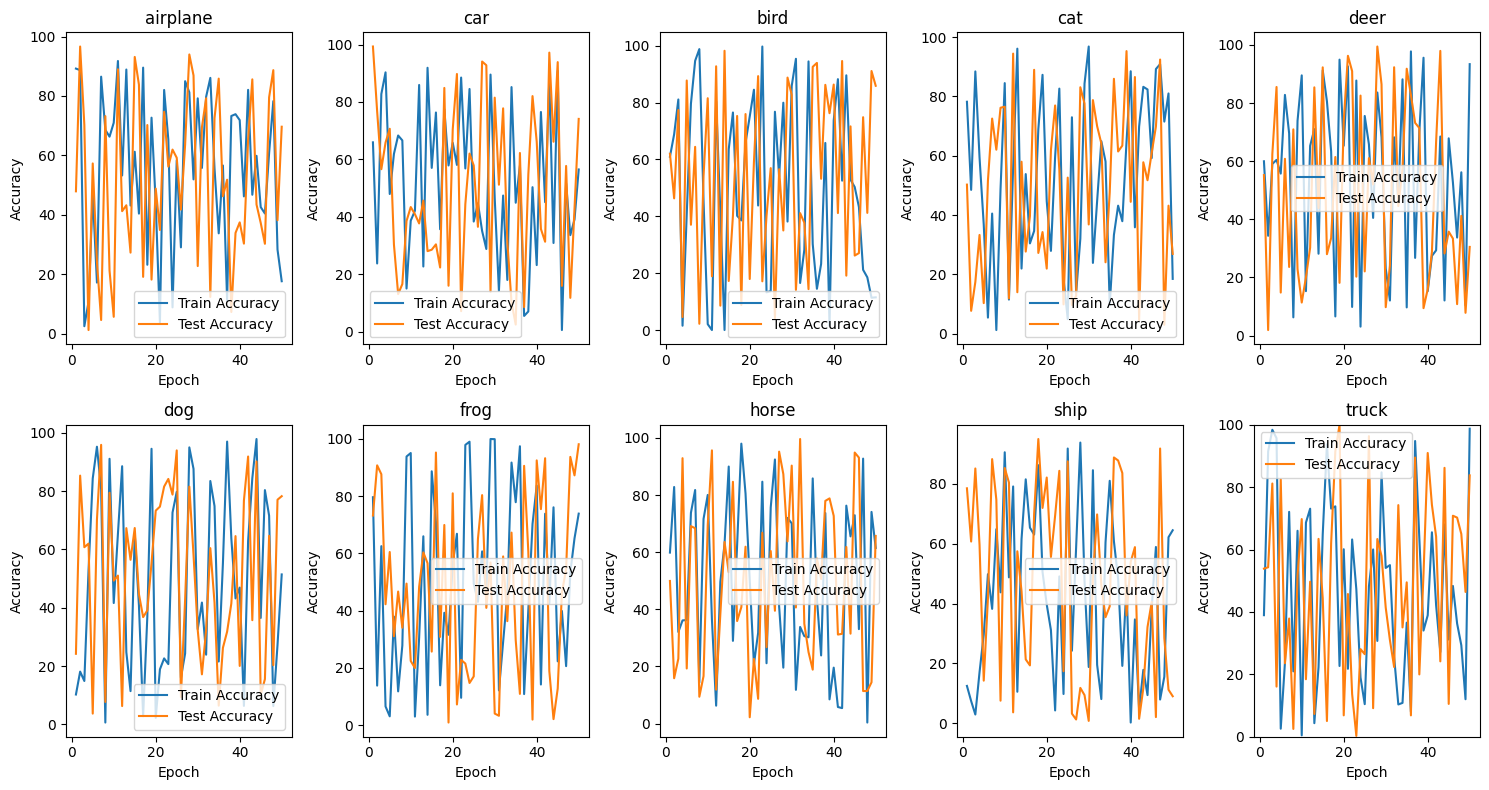

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def draw(train_accuracy, test_accuracy, classes):
    train_accuracy = np.array(train_accuracy)  # 转换为NumPy数组
    test_accuracy = np.array(test_accuracy)  # 转换为NumPy数组

    num_epochs = train_accuracy.shape[0]
    x = np.arange(1, num_epochs+1)

    num_classes = min(len(classes), 10)
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_classes:
            ax.plot(x, train_accuracy[:, i], label='Train Accuracy')
            ax.plot(x, test_accuracy[:, i], label='Test Accuracy')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')
            ax.set_title(classes[i])
            ax.legend()

    plt.ylim(0, 100)  # 设置y轴范围为0到100

    plt.tight_layout()
    plt.show()


# 假数据
train_accuracy = np.random.rand(50, 10) * 100
test_accuracy = np.random.rand(50, 10) * 100
classes = ('airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 调用绘图函数
draw(train_accuracy, test_accuracy, classes)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

# 将训练集和测试集的准确率曲线绘制出来
def draw(train_accuracy, test_accuracy, classes):
    # 获取 长度
    epochs = len(train_accuracy)
    x = range(epochs)

    # 获取数clazz list的长度
    num_classes = len(classes)
    fig, axes = plt.subplots(num_classes, 1, figsize=(8, num_classes*4), sharex=True)
    #写中文要加上其他代码
    for i, ax in enumerate(axes):
        if i < num_classes:
            ax.plot(x, train_accuracy[:, i], label='Train Accuracy')
            ax.plot(x, test_accuracy[:, i], label='Test Accuracy')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy (%)')
            ax.set_title(classes[i])
            ax.legend()

    plt.tight_layout()
    plt.show()

# 对图像进行加载+预处理
def load_preprocess_cifar10(batch_size:int):
    # 归一化
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),  # 随机裁剪
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])  
    # 读取数据,如果没有就下载
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
    return trainloader, testloader


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 填充一圈0
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        # 10类
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练和评估模型
def train_and_evaluate_model(lr:float, momentum:float, weight_decay:float, batch_size:int, epoch:int):
    # 获得已经预处理好的数据
    trainloader, testloader = load_preprocess_cifar10(batch_size) 

    net = Net()  # 创建自定义的模型对象
    # 定义loss函数
    criterion = nn.CrossEntropyLoss()  
    # 选择优化器
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay) 
     # 定义学习率调度器 之前acc一直不变，上网搜加了这个就好了 
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) 


    num_classes = 10  
    # 初始化测试集和训练集准确率矩阵
    test_accuracies = np.zeros((epoch, num_classes))  
    train_accuracies = np.zeros((epoch, num_classes)) 

    for i in range(epoch):  # 迭代训练多个周期
        train_model(net, trainloader, criterion, optimizer)  # 训练模型
        # 计算每个类别的准确率
        test_accuracies[i] = evaluate_model_per_class(net, testloader, num_classes)  # 测试集准确率
        train_accuracies[i] = evaluate_model_per_class(net, trainloader, num_classes)  # 训练集准确率
        # 更新学习率
        scheduler.step()

    return test_accuracies, train_accuracies 


def train_model(model, trainloader, criterion, optimizer):
    model.train()
    for _, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model_per_class(model, dataloader, num_classes):
    model.eval()
    correct = np.zeros(num_classes)
    total = np.zeros(num_classes)

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            for i in range(num_classes):
                mask = labels == i
                total[i] += mask.sum().item()
                correct[i] += (predicted[mask] == labels[mask]).sum().item()
    
    accuracies = (100 * correct / total)
    return accuracies

if __name__ == '__main__':
    multiprocessing.freeze_support()
    classes = ('airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    test_res, train_res = train_and_evaluate_model(lr=0.01,momentum=0.9,weight_decay=0.001,batch_size=64,epoch=50)
    print("test_res:")
    print(test_res)
    print("train_res:")
    print(train_res)
    draw(train_res, test_res, classes)